In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

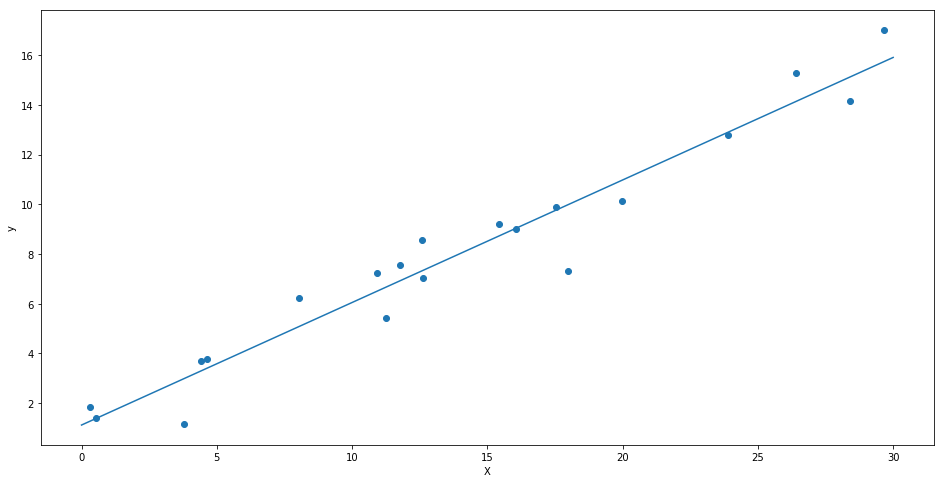

In [22]:
def plot_linear_regression():
    a = 0.5
    b = 1.0
    
    # x from 0 to 10
    x = 30 * np.random.random(20)

    # y = a*x + b with noise
    y = a * x + b + np.random.normal(size=x.shape)

    # create a linear regression classifier
    clf = LinearRegression()
    clf.fit(x[:, None], y)

    # predict y from the data
    x_new = np.linspace(0, 30, 100)
    y_new = clf.predict(x_new[:, None])

    # plot the results
    plt.figure(figsize=(16, 8))
    ax = plt.axes()
    ax.scatter(x, y)
    ax.plot(x_new, y_new)

    ax.set_xlabel('X')
    ax.set_ylabel('y')

    ax.axis('tight')


if __name__ == '__main__':
    plot_linear_regression()
    plt.show()

In [23]:
data = pd.read_csv("Advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [24]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,8400.000000,8400.00000,8400.000000,8400.000000,8400.000000
mean,100.500000,147.04250,23.264000,30.554000,14.022500
std,57.737742,85.64443,14.810527,21.725399,5.204706
min,1.000000,0.70000,0.000000,0.300000,1.600000
25%,50.750000,74.37500,9.975000,12.750000,10.375000
50%,100.500000,149.75000,22.900000,25.750000,12.900000
75%,150.250000,218.82500,36.525000,45.100000,17.400000
max,200.000000,296.40000,49.600000,114.000000,27.000000


In [25]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [26]:
data.drop(['Unnamed: 0'], axis=1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


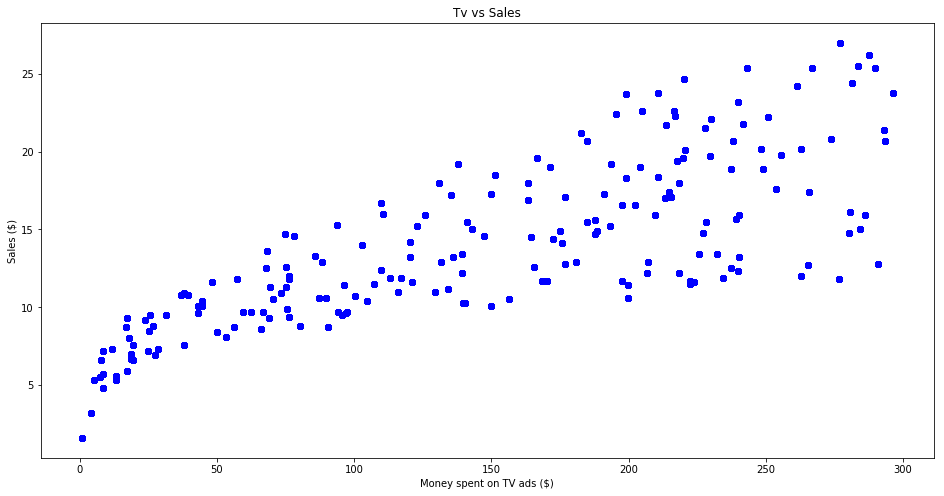

In [27]:

plt.figure(figsize=(16, 8))
plt.scatter(
    data['TV'],
    data['sales'],
    c='blue'
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.title("Tv vs Sales")
plt.show()

In [28]:
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

0.047536640433019764
7.032593549127693
The linear model is: Y = 7.0326 + 0.047537X


In [30]:
reg.score(X,y)

0.611875050850071

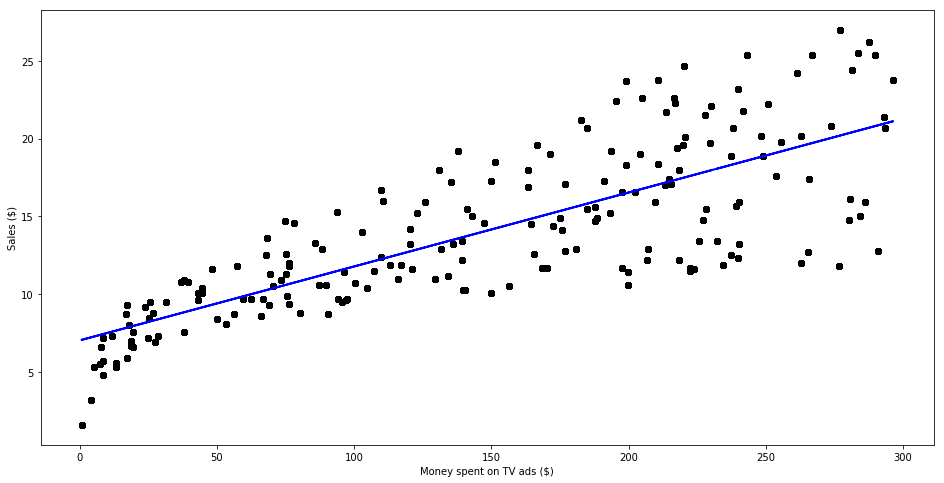

In [31]:
predictions = reg.predict(X)
#print(predictions)
plt.figure(figsize=(16, 8))
plt.scatter(
    data['TV'],
    data['sales'],
    c='black'
)
plt.plot(
    data['TV'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [32]:
X = data['TV']
y = data['sales']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                 1.324e+04
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:50:04   Log-Likelihood:                -21800.
No. Observations:                8400   AIC:                         4.360e+04
Df Residuals:                    8398   BIC:                         4.362e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.070    100.036      0.0

In [33]:
Xs = data.drop(['sales', 'Unnamed: 0'], axis=1)
y = data['sales']

reg = LinearRegression()
reg.fit(Xs, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
print(reg.coef_)
print(reg.intercept_)

[ 0.04576465  0.18853002 -0.00103749]
2.938889369459405


In [35]:
reg.score(Xs, y)

0.8972106381789521

In [36]:
X = np.column_stack((data['TV'], data['radio'], data['newspaper']))
y = data['sales']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                 2.443e+04
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:51:11   Log-Likelihood:                -16220.
No. Observations:                8400   AIC:                         3.245e+04
Df Residuals:                    8396   BIC:                         3.248e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.048     61.669      0.0